# Challenge Large Scale Machine Learning


**Fusion of algorithms for face recognition**




#### Summary

For this project, and inspired by the lessons we've had, we decided to tackle ensemble learning techniques. After exploiting our data in order to figure out what preprocessing is needed, we started with a simple ensemble algorithm which is **Random Forest.**

To improve the performance we had, we moved to **Boosting**. And after a little research, we stumbled upon two algorithms **XGboost** and **CatBoost**, which look promissing and correspond to our problem.

Thoughout this project, these are the algorithms we'll be working with. We'll compare the results of these algorithms both individually, and fused.

Here is a little resume of what we've used: 

#### Process description
At first, We have used some preprocessing for data like oversampling and undersampling to deal with umbalanced data  and also we have used feature selection. 

#### Preprocessing 

**1/Undersampling**   

One of the most common and simplest strategies to handle imbalanced data.Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution.
We use  directly on the training dataset that can then, in turn, be used to fit the machine learning model.    

**2/Oversampling** 

One way to fight this issue is to generate new samples in the classes which are under-represented. Oversampling increases the weight of the minority class by replicating the minority.  

**3/Feature selection** 

For Feature  selectionwe have used PCA. A feature selection method is proposed to select a subset of variables in principal component analysis (PCA) that preserves as much information present in the complete data as possible. 


Then we did the implementation of the algorithms for classification. 
#### Methods 

We have used Random Forest, Xgboost, Catboost. We  tested each classification individually and we  used methods for the fusion of these methods. 

#### Fusion of algorithms

In this challenge we've used 2 methods for fusion of  algorithmes : Blending and Stacking. 

**1/ Blending** :   

Blending is an ensemble method where multiple different algorithms are prepared on the training data. What we mean by blending, is to use the results of different algorithms and on different techniques, in order to reduce the missclassified images. For example, the final class would be the class given by the majority of our methods.   

**2/Stacking**:     

Stacking is a method where a single training dataset is given to multiple models and trained.  In stacking, the combining mechanism is that the output of the classifiers (Level 0 classifiers) will be used as training data for another classifier (Level 1 classifier) to approximate the same target function. Basically, you let the Level 1 classifier to figure out the combining mechanism.
For example in binary classification, you train a SVM model or a decision tree. Then you can use the output of SVM and the decision tree to train a meta classifier such as logistic regression.

![Texte alternatif…](https://drive.google.com/uc?id=1n-FLQMODUmfWj1MiVOZuZ7wCn0TuSApe)


More details about our approach are explained as we use them in the notebook.

### **I. Introduction**

#### 1. Loading and splitting Data 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import sys
import os
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load training and testing data
xtrain = np.loadtxt('xtrain_challenge.csv', delimiter=',', skiprows = 1)
ytrain = np.loadtxt('ytrain_challenge.csv', delimiter=',', skiprows = 1)
xtest = np.loadtxt('xtest_challenge.csv', delimiter=',', skiprows = 1)



```
# Ce texte est au format code
```

#### 2. Data Exploitation

In [ ]:
#Checking the number of observations and properties
print("Number of features : ", xtrain.shape[1])
print("Number of train Observations : ", xtrain.shape[0])

Number of features :  37
Number of train Observations :  1068504


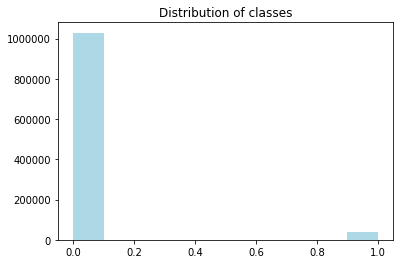

In [ ]:
# plt.hist([y_train, y_test], color=['orange', 'green'])
plt.hist(ytrain, color= "lightblue")
plt.title("Distribution of classes")
plt.show()

We can remak that classes are **imbalanced**. The label **0** (*no match between images*)  occurs much more frequently than the label **1** (*a match*)

This will be taken into account for preprocessing measures!

#### 3. Features

Checking for **missing** values as they might cause problems if they exist

In [ ]:
x= pd.DataFrame(xtrain)

null_value_stats = x.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

Our features are also all **numerical** and of the same type. So we don't need to take care of that . 

In [ ]:
print(np.array(x.dtypes))

[dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64')]


### II. Methods

To speed up calculations while we're still testing algorithms, we'll work with only a small part of the data.

In [ ]:
nrows_train = 90000
nrows_test = 30000

# #Training and test Data
x_train = xtrain[:nrows_train]
x_test =  xtrain[nrows_train : (nrows_train + nrows_test)]

# #Training and test labels
y_train = ytrain[:nrows_train]
y_test = ytrain[nrows_train : (nrows_train + nrows_test)]

#### 1. Random Forest


Let's first try an ensemble learning algorithm such as Random Forest. We do not need to scale the data for this algorithm, because it is based on **decision trees**. It also avoids dealing with correlated trees. We will tune the parameters using **GridSearchCV**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Hypterparameters Tuning
RF=RandomForestClassifier(criterion="gini", random_state=0)
p_grid_RF = {'n_estimators': [20,25,30], 'min_samples_leaf': [2,3,4,5]}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring="balanced_accuracy", cv=5)
grid_RF.fit(x_train, y_train)
print("Best Score: {}".format(grid_RF.best_score_))
print("Best params: {}".format(grid_RF.best_params_))

Best Score: 0.9785374865789281
Best params: {'min_samples_leaf': 2, 'n_estimators': 25}


In [ ]:
# Fitting Data
best_params=grid_RF.best_params_

RF = RandomForestClassifier(criterion="gini",min_samples_leaf=best_params["min_samples_leaf"],
                            max_features='sqrt',n_estimators=best_params["n_estimators"], random_state=0)
RF.fit(x_train, y_train)

# Testing
yvalid_RF = RF.predict(x_test)
print('accuracy score :',(yvalid_RF == y_test).mean())

accuracy score : 0.9972666666666666


But accuracy is not the only function to measure an algorithms performance. We'll take a look at the **confusion matrix**, so that we can compare the **TF, TN, FP and FN** of the algorithms

<Figure size 360x360 with 0 Axes>

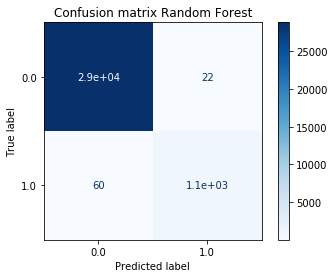

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cf_matx_rf = confusion_matrix(y_test, yvalid_RF)

plt.figure(figsize=(5,5))
matrix=plot_confusion_matrix(RF,x_test,y_test,
                                 cmap=plt.cm.Blues)

matrix.ax_.set_title('Confusion matrix Random Forest')
plt.show()

While a satisfying result for our first try, we'll still aim improve this performance. So we'll move on to **Boosting** techniques. As they make weak algorithms stronger, we'll try  at first **XGBoost**.

#### 2. XGBoost

In [ ]:
import xgboost as xgb

# Fitting Data
clf_xgb = xgb.XGBClassifier(learning_rate = 0.5)
clf_xgb.fit(x_train, y_train)

# Testing
yvalid_xgb = clf_xgb.predict(x_test)
print('accuracy score :',(yvalid_xgb == y_test).mean())

accuracy score : 0.9979666666666667


<Figure size 360x360 with 0 Axes>

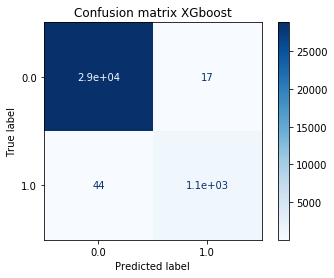

In [ ]:
plt.figure(figsize=(5,5))
matrix=plot_confusion_matrix(clf_xgb,x_test,y_test,
                                 cmap=plt.cm.Blues)

matrix.ax_.set_title('Confusion matrix XGboost')
plt.show()

Ok, that is a better result than Random Forest which was expected. But observing the confusion matrix we  notice that the two methodes make almost the same error. In order to understand this more, le's focus on the **distribution of the error**. 

# #### Error Distribution

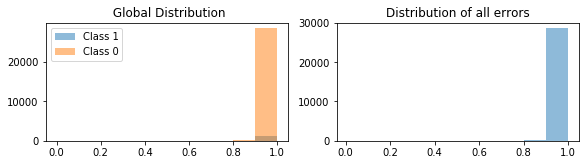

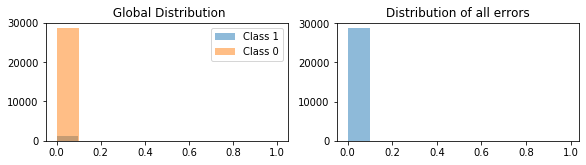

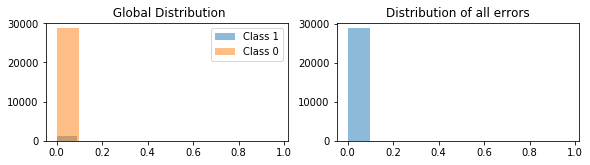

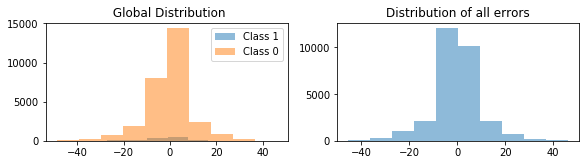

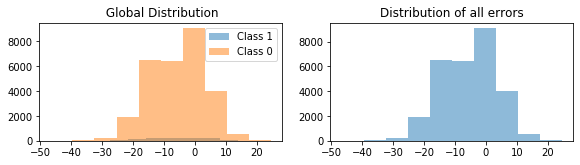

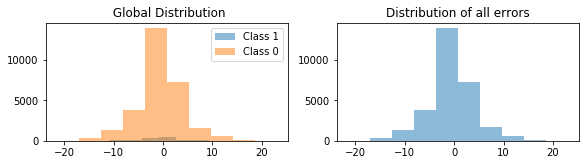

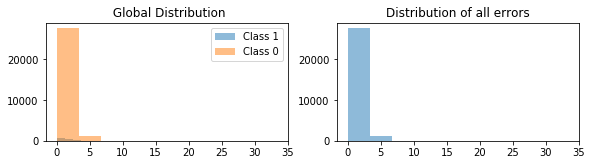

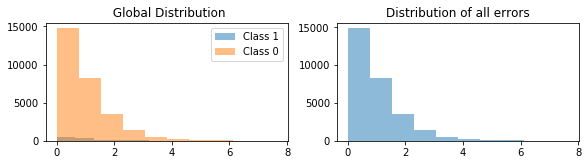

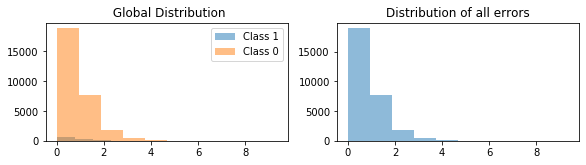

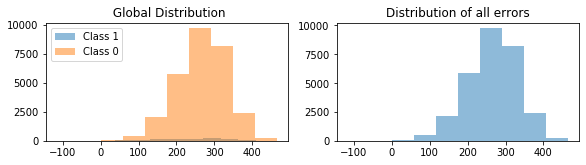

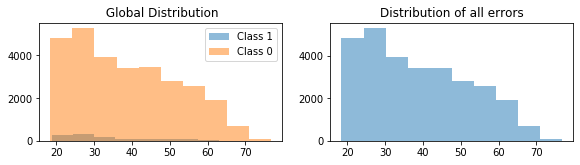

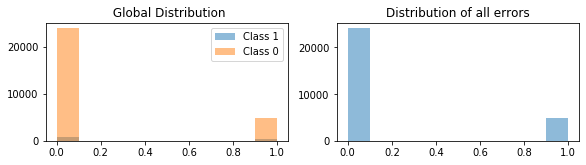

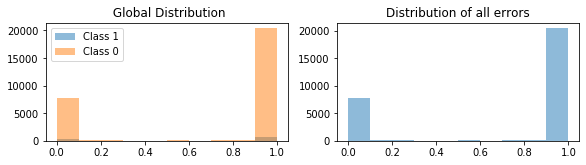

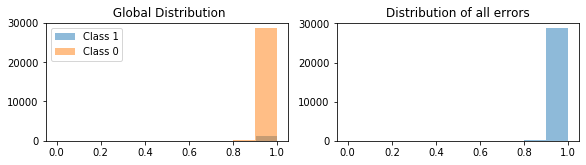

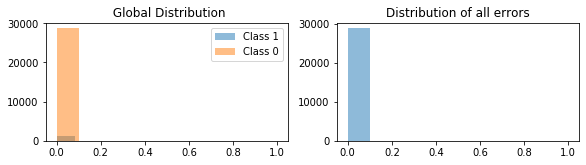

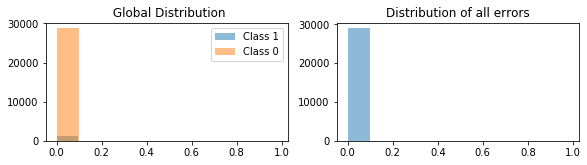

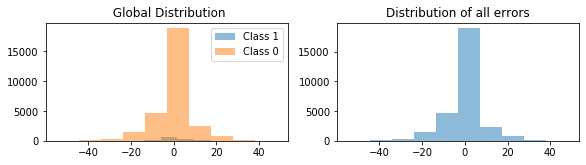

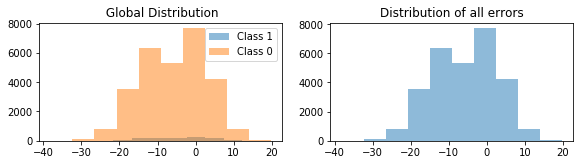

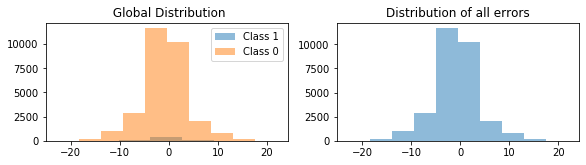

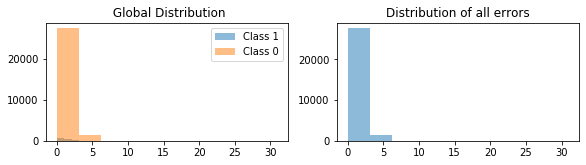

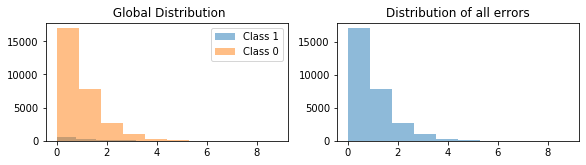

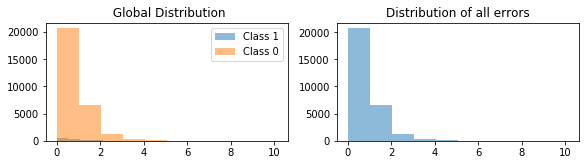

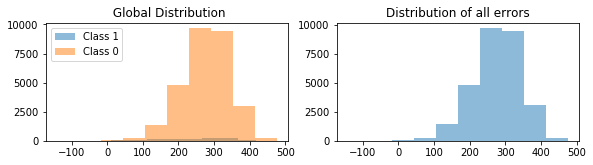

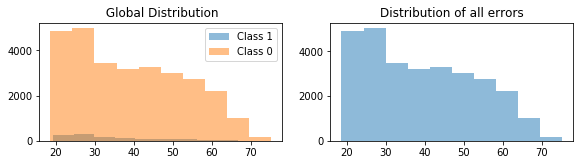

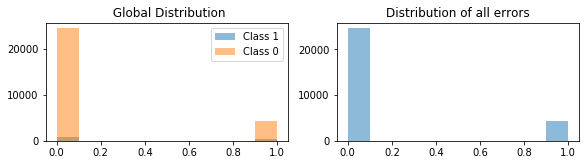

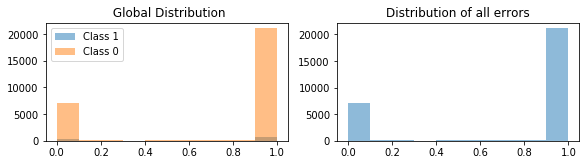

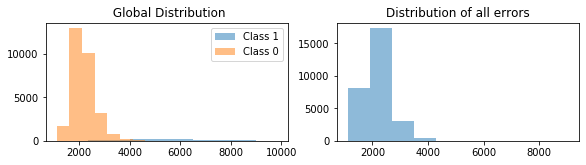

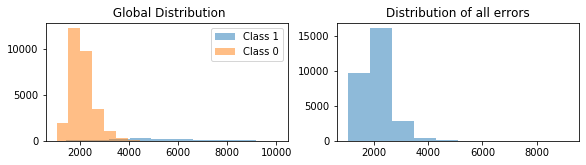

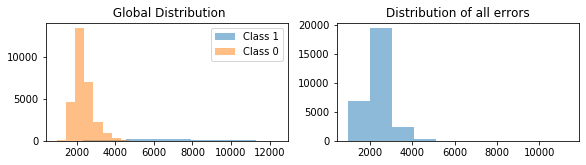

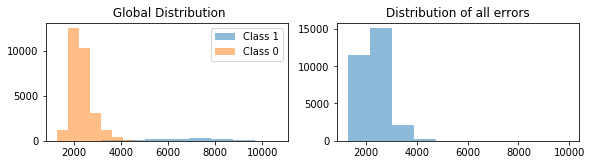

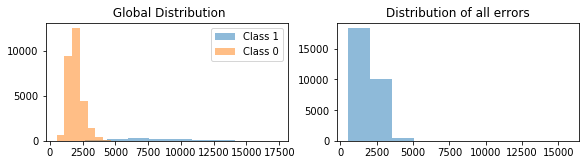

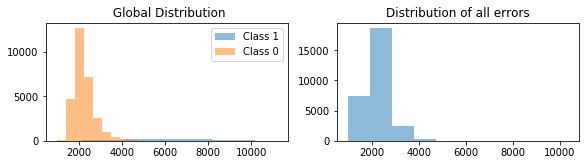

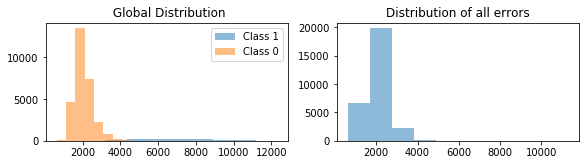

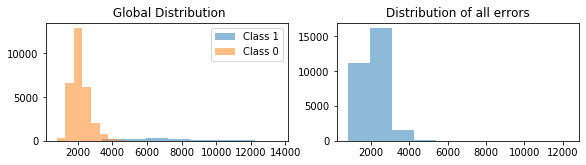

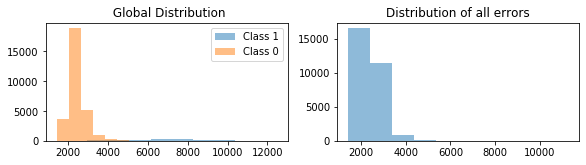

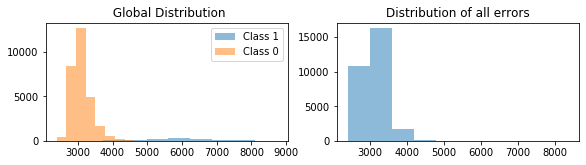

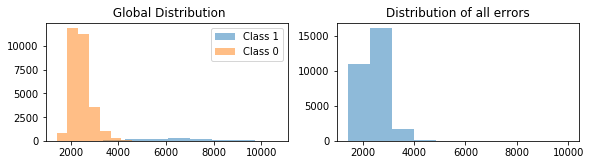

In [ ]:
x_t = pd.DataFrame(x_test )
y_t = pd.DataFrame(y_test,columns={'y'} )
yv_t=pd.DataFrame(yvalid_RF ,columns={'y_vd'})
x_test_focus = pd.concat([x_t.reset_index(), pd.concat([y_t.reset_index(),yv_t], axis=1)], axis=1)
x_test_focus = x_test_focus.drop(columns=['index'])

for col in x_test_focus.columns.tolist()[:-2]:
    plt.figure(figsize=(20,10))
    plt.subplot(441)
    plt.hist(x_test_focus[x_test_focus['y']==1][col], alpha=0.5, label='Class 1')
    plt.hist(x_test_focus[x_test_focus['y']==0][col], alpha=0.5, label='Class 0')
    plt.legend()
    plt.title(' Global Distribution')
    plt.subplot(442)
    plt.hist(x_test_focus[x_test_focus['y']!=x_test_focus[0]][col], alpha = 0.5, label='Predicted Error')
    plt.title('Distribution of all errors')
    
plt.show()

This shows that the misclassified instances are caused by the overlapping data, which is another thing to take into account.

Given that our data is imbalanced, we'll try **preprocessing** the data from **oversampling** to **undersampling** and **feature selection** to compensate for the lack of ones and to reduce the overlapping of data. 

### III. Preprocessing techniques

#### 1. Oversampling data

We'll use the SMOTE technique to over sample data.
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

sm = SMOTE(random_state=42, sampling_strategy="minority")
x_train_scaled, y_train_scaled = sm.fit_resample(x_train, y_train)

print("Original training data shape :", x_train.shape)
print("Oversampled training data shape : ", x_train_scaled.shape)
print("Oversampled training labels shape : ", y_train_scaled.shape)

Using TensorFlow backend.


Original training data shape : (90000, 37)
Oversampled training data shape :  (173330, 37)
Oversampled training labels shape :  (173330,)


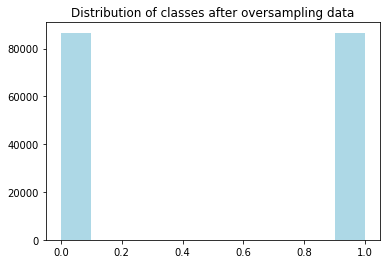

In [ ]:
plt.hist(y_train_scaled, color= "lightblue")
plt.title("Distribution of classes after oversampling data")
plt.show()

Now that our data is balanced, we'll run xgboost again and we'll take another look at the confusion matrix.

In [ ]:
# XGBoost on Oversampled data
clf_xgb.fit(x_train_scaled, y_train_scaled)

# Testing
yvalid_xgb_over = clf_xgb.predict(x_test)
print('accuracy score :',(yvalid_xgb_over == y_test).mean())

accuracy score : 0.9977333333333334


<Figure size 360x360 with 0 Axes>

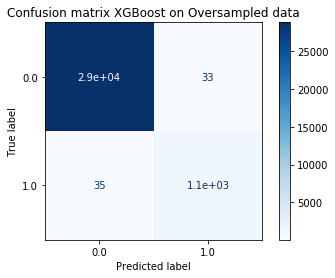

In [ ]:
cf_matx_over = confusion_matrix(y_test, yvalid_xgb_over)

plt.figure(figsize=(5,5))
matrix=plot_confusion_matrix(clf_xgb,x_test,y_test,
                                 cmap=plt.cm.Blues)

matrix.ax_.set_title('Confusion matrix XGBoost on Oversampled data')
plt.show()

#### 2. Undersampling data

Another way to balance data, is to undersample the majority class.

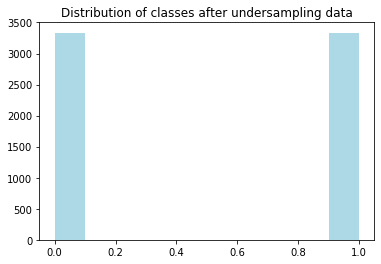

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(x_train, y_train)
plt.hist(y_under, color= "lightblue")
plt.title("Distribution of classes after undersampling data")
plt.show()

In [ ]:
# XGBoost on Oversampled data
clf_xgb.fit(X_under, y_under)

# Testing
yvalid_xgb_under = clf_xgb.predict(x_test)
print('accuracy score :',(yvalid_xgb_under == y_test).mean())

accuracy score : 0.9927333333333334


<Figure size 360x360 with 0 Axes>

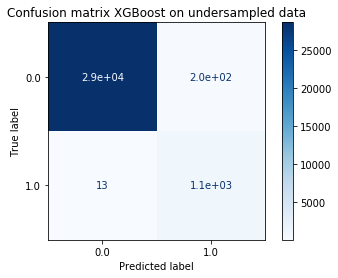

In [ ]:
cf_matx_under = confusion_matrix(y_test, yvalid_xgb_under )

plt.figure(figsize=(5,5))
matrix=plot_confusion_matrix(clf_xgb,x_test,y_test,
                                 cmap=plt.cm.Blues)

matrix.ax_.set_title('Confusion matrix XGBoost on undersampled data')
plt.show()


Though the errors of FP and FN have improved, we were surprised by the drop in accuracy. Looking more intro it, we found out that this is called the **metric trap**.
Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

But we can't just not consider the fact that our data is highly imbalanced. That's why we'll try **blending** these results in the hope that they copensate for the misclassified images.

#### 3. Blending

What we mean by blending, is to use the results of different algorithms and on different techniques, in order to reduce the missclassified images. For example, the final class would be the class given by the majority of our methods.

In [ ]:
from sklearn.metrics import accuracy_score

# Summing predictions 
blend = np.sum([yvalid_xgb, yvalid_xgb_under, yvalid_xgb_over], axis=0)

# Building new predictions 
blend_pred = np.zeros(len(blend))
for i,x in enumerate(blend):
    if x>1:
        blend_pred[i] = 1

print("Score of blended  xgboost: {}".format(accuracy_score(y_test, blend_pred)))
print("Score of original xgboost : {}".format(accuracy_score(y_test, yvalid_xgb)))
        

Score of blended  xgboost: 0.9979333333333333
Score of original xgboost : 0.9979666666666667


It is a slight improvement. But we'll take it.

#### 4. Feature Selection

 Now that we've dealt with the imbalance of our dataset, let's deal with features. Perhaps there are features that are redundant or don't really describe our data. Chosing to work only with the important features, should improve the performance and also help us gain in coputational time. For this, we'll use **PCA** and keep only the features that contain **99%** of the variance. And we'll evaluate the performance using XGBoost.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.99)
pca.fit(x_train)

x_train_pca =  pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("Number of features selected : ", x_train_pca.shape[1])

Number of features selected :  9


In [ ]:
# Fitting
clf_xgb.fit(x_train_pca, y_train)

# Testing
yvalid_xgb = clf_xgb.predict(x_test_pca)
print('accuracy score :',(yvalid_xgb == y_test).mean())

accuracy score : 0.997


Feature selection did not improve the performance, which means that there aren't any features that make our classification worse. And we have time so we'll work with all the features, to have even a slight better accuracy.

So far, we have tried different methods and techniques of preprocessing. The best one yet, is the XGBoost blended with oversampled and undersampled data. But perhaps we can make it even better if we chose another boosting algorithm. 


### IIII. CatBoost

During our search, a relatively new boosting method has cought our attention. **CatBoost** surpasses XGboost and LightBM not only in time but also in accuracy. The strength of CatBoost lies in its automatic ability to handle categorial data with high accuracy and in so little time. You'll see this as we plot our results to give a better visualisation of the learning phase. 

#### 1. Installing Catboost

In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier, Pool, cv

#installing hyperopt we'll use later to fine tune the model
#!pip install hyperopt

#### 2. Defining the model

First, we'll define the model's parameters, most of which are by default. But according to our research, the default parameters already give a satisfying result.

In [ ]:
model = CatBoostClassifier(
    random_seed=42,
    iterations=2000,
    depth=8,
    learning_rate=0.05,
    devices='0:1', 
    logging_level = 'Silent',
    task_type="GPU",
    custom_loss=['Accuracy'],
)

#### 3. Cross validation

Instead of fitting the model on our train set and use the validation set to evaluate it, we'll cross validate it so we can have a more precise performance of the accuracy. CatBoost has a built-in method to deal with that which is CV.

In [ ]:
# Cross validation
warnings.filterwarnings('ignore')
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(x_train, y_train),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

Best validation accuracy score: 1.00±0.00 on step 500


In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.9982000014800988


#### 5. Using Best model

To fit the model on our traning set, we'll use the best_model method argument during training. If it is enabled, the resulting trees ensemble is shrinking to the best iteration.

In [ ]:
# Extracting the best model
warnings.filterwarnings('ignore')
modelc = CatBoostClassifier(**cv_params)
modelc.fit(x_train, y_train)

best_model_params_c = cv_params.copy()
best_model_params_c.update({
    'use_best_model': True
})

Now before we fit the model on our dataset, we'll pool the input. Again this is another method of CatBoost which allows us to pass the inpurt dataset the fastest way possible. First we'll create two pools, one for training, and one fr validating the result. 

In [ ]:
# Pools
from sklearn.model_selection import cross_val_score, train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x_train,y_train ,test_size = 0.1 ,random_state=0)
train_pool = Pool(x_train, y_train)
validate_pool = Pool(x_te, y_te)

In [ ]:
# Fitting the model

best_model = CatBoostClassifier(**best_model_params_c)
best_model.fit(train_pool, eval_set=validate_pool, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
yvalid_catboost=best_model.predict(x_test)
print('accuracy score :',(yvalid_catboost == y_test).mean())

accuracy score : 0.9982


<Figure size 360x360 with 0 Axes>

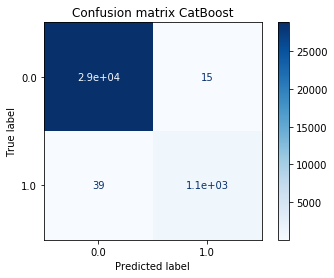

In [ ]:
cf_matx_catboost = confusion_matrix(y_test, yvalid_catboost)

plt.figure(figsize=(5,5))
matrix=plot_confusion_matrix(best_model,x_test,y_test,
                                 cmap=plt.cm.Blues)

matrix.ax_.set_title('Confusion matrix CatBoost')
plt.show()

As expected CatBoost gives better performance than XGBoost. Let's try to blending it with the other methods.

#### 6. Blending

Observing all the confusion matrix:


1.   First, comparing Random forst and xgboost, we notice that the number of the NF and NP for the both classes with Random forst are bigger than the number of NF and NP with xgboost **=>** We can just use xgboost

2.   Second, comparing the confusion matrix of xgboost and xgboost with preprocessing, We notice that the number of mislabeled instances for the class 1 is smaller when We use the preprocessung **=>** We will use it for blending


We will use the decisions from multiple models in the goal if improving the overall performance. 


In [ ]:
blend_methods = np.sum([yvalid_catboost, yvalid_xgb,blend_pred], axis=0)

# Building new predictions based on majority
blend_methods_pred = np.zeros(len(blend_methods))
for i,x in enumerate(blend_methods):
    if x>1:
        blend_methods_pred[i] = 1

In [ ]:
print('accuracy score with blending :',(blend_methods_pred == y_test).mean())

accuracy score with blending : 0.9980666666666667


The result has improved. Now we will  use all the data for training because having more data is always a good idea. It allows the “data to tell for itself,” instead of relying on assumptions and weak correlations. Presence of more data results in better and accurate models.

### IV. Training with all the data and testing submissions

#### XGBoost

In [ ]:
# Fitting Data
clf_xgb_data = xgb.XGBClassifier(learning_rate = 0.35)
clf_xgb_data.fit(xtrain, ytrain)

# Predicting and submitting
yvalid_xgb_f = clf_xgb_data.predict(xtest)

np.savetxt('ytest_challenge_student.csv', yvalid_xgb_f, fmt = '%1.0d', delimiter=',')

#### XGBoost on Oversampled data

In [ ]:
sm = SMOTE(random_state=42, sampling_strategy="minority")
x_train_scaled_data, y_train_scaled_data = sm.fit_resample(xtrain, ytrain)
clf_xgb_data.fit(x_train_scaled_data, y_train_scaled_data)


# Testing
yvalid_xgb_data_over = clf_xgb_data.predict(xtest)

#### XGBoost on Undersampled data

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_data, y_under_data = undersample.fit_resample(xtrain, ytrain)
clf_xgb_data.fit(X_under_data,  y_under_data )

# Testing
yvalid_xgb_data_under = clf_xgb_data.predict(xtest)

#### Blended XGBoost 

In [ ]:
# Blended XGBoost
blend_data_f = np.sum([yvalid_xgb_f, yvalid_xgb_data_under ,yvalid_xgb_data_over], axis=0)

# Building new predictions 
blend_pred_data_f = np.zeros(len(blend_data_f))
for i,x in enumerate(blend_data_f):
    if x>1:
        blend_pred_data_f[i] = 1
        
np.savetxt('ytest_challenge_student.csv', blend_pred_data_f, fmt = '%1.0d', delimiter=',')

#### CatBoost

In [ ]:

model_cat = CatBoostClassifier(custom_loss=['Accuracy'],
    logging_level='Silent')

# Cross Validation

cv_params_data = model_cat.get_params()
cv_params_data.update({
    'loss_function': 'Logloss'
})
print("Beginning Cross validation, approx 20 min ---")
warnings.simplefilter("ignore")

cv_data_2 = cv(
    Pool(xtrain, ytrain),
    cv_params_data,
    plot=False,
    verbose = 0
)
# Fitting
print("Fitting on all data ---")
model_data = CatBoostClassifier(**cv_params_data)
model_data.fit(xtrain, ytrain, plot= False)

# Chosing the best model
print("Chosing the best model ---")
best_model_params_data = cv_params_data.copy()
best_model_params_data.update({
    'use_best_model': True
})

# Creating pools
print("Creating pools ---")
x_tr_data, x_te_data, y_tr_data, y_te_data = train_test_split(xtrain,ytrain ,test_size = 0.1 ,random_state=0)

train_pool_data= Pool(x_tr_data, y_tr_data)
validate_pool_data = Pool(x_te_data, y_te_data)

# Fitting the best model
print("Fitting the best model ---")
best_model_data = CatBoostClassifier(**best_model_params_data)
best_model_data.fit(train_pool_data, eval_set=validate_pool_data, plot = True)

Beginning Cross validation, approx 20 min ---
Fitting on all data ---
Chosing the best model ---
Creating pools ---
Fitting the best model ---


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
# Predicting
yvalid_catboost_f=best_model_data.predict(xtest)

np.savetxt('ytest_challenge_student.csv', yvalid_catboost_f, fmt = '%1.0d', delimiter=',')

#### Blending all methods

In [ ]:
# All methods blended
blend_methods_data_f = np.sum([yvalid_catboost_f,yvalid_xgb_f,blend_pred_data_f], axis=0)

# Building new predictions based on majority
blend_methods_pred_data_f = np.zeros(len(blend_methods_data_f))
for i,x in enumerate(blend_methods_data_f):
    if x>1:
        blend_methods_pred_data_f[i] = 1
        
#Submission file
np.savetxt('ytest_challenge_student.csv', blend_methods_pred_data_f, fmt = '%1.0d', delimiter=',')


Now let's prepare the test labels for the final submissions

**Remark** Using only Catboost gave us the best result. 

### V. Hyperparameter Tuning

So far, we have been working mostly with default values for the parameters of both boosting algorithms, XGBoost and Catboost. While they already give a satisfying result with the problem we're dealing with, we are curious to know if we can have an even better accuracy, if we chose these parameters more rationally.

The hyper-parameter tuning process is a tightrope walk to achieve a balance between underfitting and overfitting. We will use the random search  to tune hyperparameters of each model. Random Search  does random search on the step 1 to pick a point randomly from the configuration space. The intuition of how it works better is that we can explore the hyper-parameters space  widely. This will help us to find the best configuration in fewer iterations.

![Texte alternatif…](https://drive.google.com/uc?id=1OJQeVq4GU66FVTS79LCIvQFC5GCVi5Up)

#### 1. Tuning XGBoost

In [ ]:
# Defining the model and its parameter space
clf_xgb_hyp = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3,1],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random search
rs_clf_xgb = RandomizedSearchCV(clf_xgb_hyp, param_grid, n_iter=20,
                            n_jobs=1, verbose=False, cv=2,
                             refit=True, random_state=42)


In [ ]:
rs_clf_xgb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                             

In [ ]:
best_score = rs_clf_xgb.best_score_
best_params = rs_clf_xgb.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9987206411955407
Best params: 
colsample_bylevel: 0.5
colsample_bytree: 1.0
gamma: 0.5
learning_rate: 0.2
max_depth: 6
min_child_weight: 10.0
n_estimators: 100
reg_lambda: 0.1
silent: False
subsample: 0.6


We'll fit with those parameters.

In [ ]:
model_xgb_t = xgb.XGBClassifier(silent=False, 
                        colsample_bylevel=0.5,
                        colsample_bytree= 1.0,
                        gamma= 0.5,
                        learning_rate= 0.2,
                        max_depth= 6,
                        min_child_weight=10.0,
                        n_estimators=100,
                        reg_lambda=0.1,

                        subsample= 0.6)
# Fittin with tuned
model_xgb_t.fit(xtrain, ytrain)

# Predicting and submitting
yvalid_xgb_t = model_xgb_t.predict(xtest)
np.savetxt('ytest_challenge_student.csv', yvalid_xgb_t, fmt = '%1.0d', delimiter=',')

#### 2. Tuning Catboost

In [ ]:
model_cat_rd = CatBoostClassifier(custom_loss=['Accuracy'],
    logging_level='Silent',
    task_type="GPU",
)

grid = {'learning_rate':[0.001, 0.01,0.03, 0.1, 0.2,3,0.9], 
        'depth': [4, 6, 8,10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

randomized_search_result = model_cat_rd.randomized_search(grid,
                                                   X=xtrain,
                                                   y=ytrain,
                                                   plot=True)
print("Best params: ",randomized_search_result['params'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.0051057	best: 0.0051057 (0)	total: 1m 13s	remaining: 11m
1:	loss: 0.0041561	best: 0.0041561 (1)	total: 3m 34s	remaining: 14m 19s
2:	loss: 0.0041588	best: 0.0041561 (1)	total: 6m 7s	remaining: 14m 17s
3:	loss: 0.0041650	best: 0.0041561 (1)	total: 8m 43s	remaining: 13m 5s
4:	loss: 0.0038976	best: 0.0038976 (4)	total: 11m 4s	remaining: 11m 4s
5:	loss: 0.0105477	best: 0.0038976 (4)	total: 19m 54s	remaining: 13m 16s


learning rate is greater than 1. You probably need to decrease learning rate.


6:	loss: 0.0185471	best: 0.0038976 (4)	total: 28m 54s	remaining: 12m 23s
7:	loss: 0.0038912	best: 0.0038912 (7)	total: 36m 34s	remaining: 9m 8s
8:	loss: 0.0040157	best: 0.0038912 (7)	total: 44m 59s	remaining: 4m 59s
9:	loss: 0.0107895	best: 0.0038912 (7)	total: 53m 27s	remaining: 0us
Estimating final quality...
Best params:  {'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [ ]:
# Fitting with tuned parameters

clf_cb_t= CatBoostClassifier(iterations=3000,depth=10, learning_rate=0.1,l2_leaf_reg= 5,    logging_level='Silent',
    task_type="GPU",  )
clf_cb_t.fit(xtrain,
          ytrain,
           eval_set=[( x_te_data, y_te_data)], plot = True)

# Predicting and submiting
yvalid_cat_t =clf_cb_t.predict(xtest)
np.savetxt('ytest_challenge_student.csv', yvalid_xgb_t, fmt = '%1.0d', delimiter=',')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### VI. Stacking

Another method of ensemble learning is stacking. Instead of using the predictions of the algorithms, stacking is a technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on a complete training set, then the meta-model is trained on the outputs of the base level model as features.

#### 1. Stacking XGboost and Catboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

clf_cb_6 = CatBoostClassifier(iterations=3000,depth=8, learning_rate=0.05,
                              logging_level = 'Silent',
                           devices='0:1' )
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[ clf_xgb_data,clf_cb_6], 
                          meta_classifier=lr)
sclf.fit(xtrain,ytrain)

StackingClassifier(average_probas=False,
                   classifiers=[XGBClassifier(base_score=0.5, booster=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.35,
                                              max_delta_step=0, max_depth=6,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_job...
                   meta_classifier=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
    

In [ ]:
ysf1=sclf.predict(xtest)
np.savetxt('ytest_challenge_student.csv', ysf1, fmt = '%1.0d', delimiter=',')

#### 2. Stacking Catboost and RF

In [ ]:
lr = LogisticRegression()

sclf2 = StackingCVClassifier(classifiers=[ clf_cb_6,RF ], 
                          meta_classifier=lr)
sclf2.fit(xtrain,ytrain)

StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x7f371a097950>,
                                  RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_s

In [ ]:
ysf2=sclf2.predict(x_test)
np.savetxt('ytest_challenge_student.csv', ysf2, fmt = '%1.0d', delimiter=',')

### Conclusion

To summerize, the best result we have obtained among all the mothods and techniques we have used, was with **CatBoost**, with no preprocessing whatsoever, no feature selection and no fusion with any other algorithm.

What was most surprizing is the fact that balancing our data did not improve the accuracy. However, accuracy is not always the best metric to use when comparing algorithms training on an unbalanced data. We have proved that balancing data, with **Oversampling** or **Undersampling**, does indeed reduce the FT and FN.

**Feature selection** did not improve the result, but it did not worsen it either. Going from 37 features to 9 features, should have worsened the accuracy. The fact that it did not, proves that in this case, **accurasy is illusioanist**.

All algorithms give rather satisfactory results. We thought fusing them, wether with **blending** or **stacking**, would compensate for the mistakes made by the minority of them. 

All in all, we got the chance to practice many techniques, and develop a critical thinking about when and why methods work, or don't. 